Importing all required libraries

In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import re
import nltk
from textblob import TextBlob

Dataset Path

In [2]:
paths = ['TweetIDs_November.csv', 'TweetIDs_December.csv', 'TweetIDs_January.csv', 'TweetIDs_February.csv', 
        'TweetIDs_March.csv', 'TweetIDs_April.csv', 'TweetIDs_May.csv']

Reading Dataset

In [5]:
twitter_dataset = pd.DataFrame()
for file in paths:
    dataset = pd.read_csv(file)
    frames = [tweet_dataset, dataset]
    twitter_dataset = pd.concat(frames, ignore_index = True)

In [6]:
twitter_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513037 entries, 0 to 513036
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   coordinates                 364 non-null     object 
 1   created_at                  513037 non-null  object 
 2   hashtags                    92422 non-null   object 
 3   media                       74121 non-null   object 
 4   urls                        208725 non-null  object 
 5   favorite_count              513037 non-null  int64  
 6   id                          513037 non-null  int64  
 7   in_reply_to_screen_name     227190 non-null  object 
 8   in_reply_to_status_id       223711 non-null  float64
 9   in_reply_to_user_id         227190 non-null  float64
 10  lang                        513037 non-null  object 
 11  place                       8962 non-null    object 
 12  possibly_sensitive          254777 non-null  object 
 13  quote_id      

In [7]:
twitter_dataset.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Wed Nov 24 05:28:10 +0000 2021,NaN,NaN,NaN,0,1463378891418988546,11MrHc11,1.463347e+18,8.750047e+17,...,122,128,2,NaN,Omi,Omicron_sky,5758,NaN,NaN,False
1,NaN,Wed Nov 24 15:52:16 +0000 2021,NaN,NaN,NaN,1,1463535951313977344,lollipop8l9,1.463531e+18,8.248749e+17,...,101,163,25,NaN,はむたろう,Amagumo_anal,9538,NaN,NaN,False
2,NaN,Wed Nov 24 23:25:58 +0000 2021,NaN,NaN,NaN,0,1463650127084769292,serrisvnt_s,1.463649e+18,1.345216e+18,...,290,202,0,Alsace / Veneto ✝️,s 🇨🇵🇮🇹,serrisvnt_s,5567,NaN,NaN,False
3,NaN,Wed Nov 24 12:51:15 +0000 2021,NaN,NaN,NaN,0,1463490396672065536,thatavinash,1.463490e+18,4.512096e+08,...,148,88,2,"Earth, Alternate Reality",Zeta 💜,zeta_omicron_,2324,NaN,http://www.instagram.com/zeta.omicron,False
4,NaN,Wed Nov 24 13:23:10 +0000 2021,NaN,NaN,NaN,0,1463498426688045058,NaN,NaN,NaN,...,229,312,0,NaN,AlbertttttS,Hyper_Omicron,2466,NaN,NaN,False


Tweet text preprocessing

In [32]:
twitter_dataset['text'] = twitter_dataset['text'].str.replace("([@#][A-Za-z0-9_]+)|(\w+:\/\/\S+)", "", regex = True)
twitter_dataset['text'] = twitter_dataset['text'].str.replace(r'[^\w\s]', '', regex = True)
twitter_dataset['text'] = twitter_dataset['text'].str.replace(r'\s+', ' ', regex = True) 

Tweet analyzer

In [19]:
def get_sentiment(dataset):
        sentiments = []
        for tweet in dataset['text']:
            analysis = TextBlob(tweet)
            if analysis.sentiment.polarity > 0:
                ans = 'positive'
            elif analysis.sentiment.polarity == 0:
                ans = 'neutral'
            else:
                ans = 'negative'
            sentiments.append(ans)
        return sentiments

In [20]:
twitter_dataset['category'] = get_sentiment(twitter_dataset)

In [26]:
twitter_dataset['category']

0          neutral
1          neutral
2          neutral
3         negative
4          neutral
            ...   
513032    negative
513033    positive
513034    negative
513035    positive
513036     neutral
Name: category, Length: 513037, dtype: object

In [23]:
def plot_graph(sentiment_counts):
    sentiment_counts = dict(sentiment_counts.value_counts())
    plt.pie(sentiment_counts.values(), labels = sentiment_counts.keys(), autopct='%.2f')
    plt.show()

In [29]:
twitter_dataset['category'].value_counts()


neutral     249819
positive    181484
negative     81734
Name: category, dtype: int64

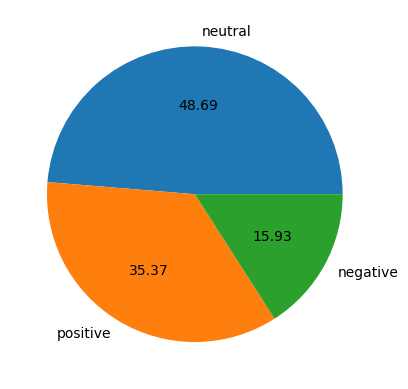

In [30]:
plot_graph(twitter_dataset['category'])